In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.shape

(11162, 17)

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## EDA

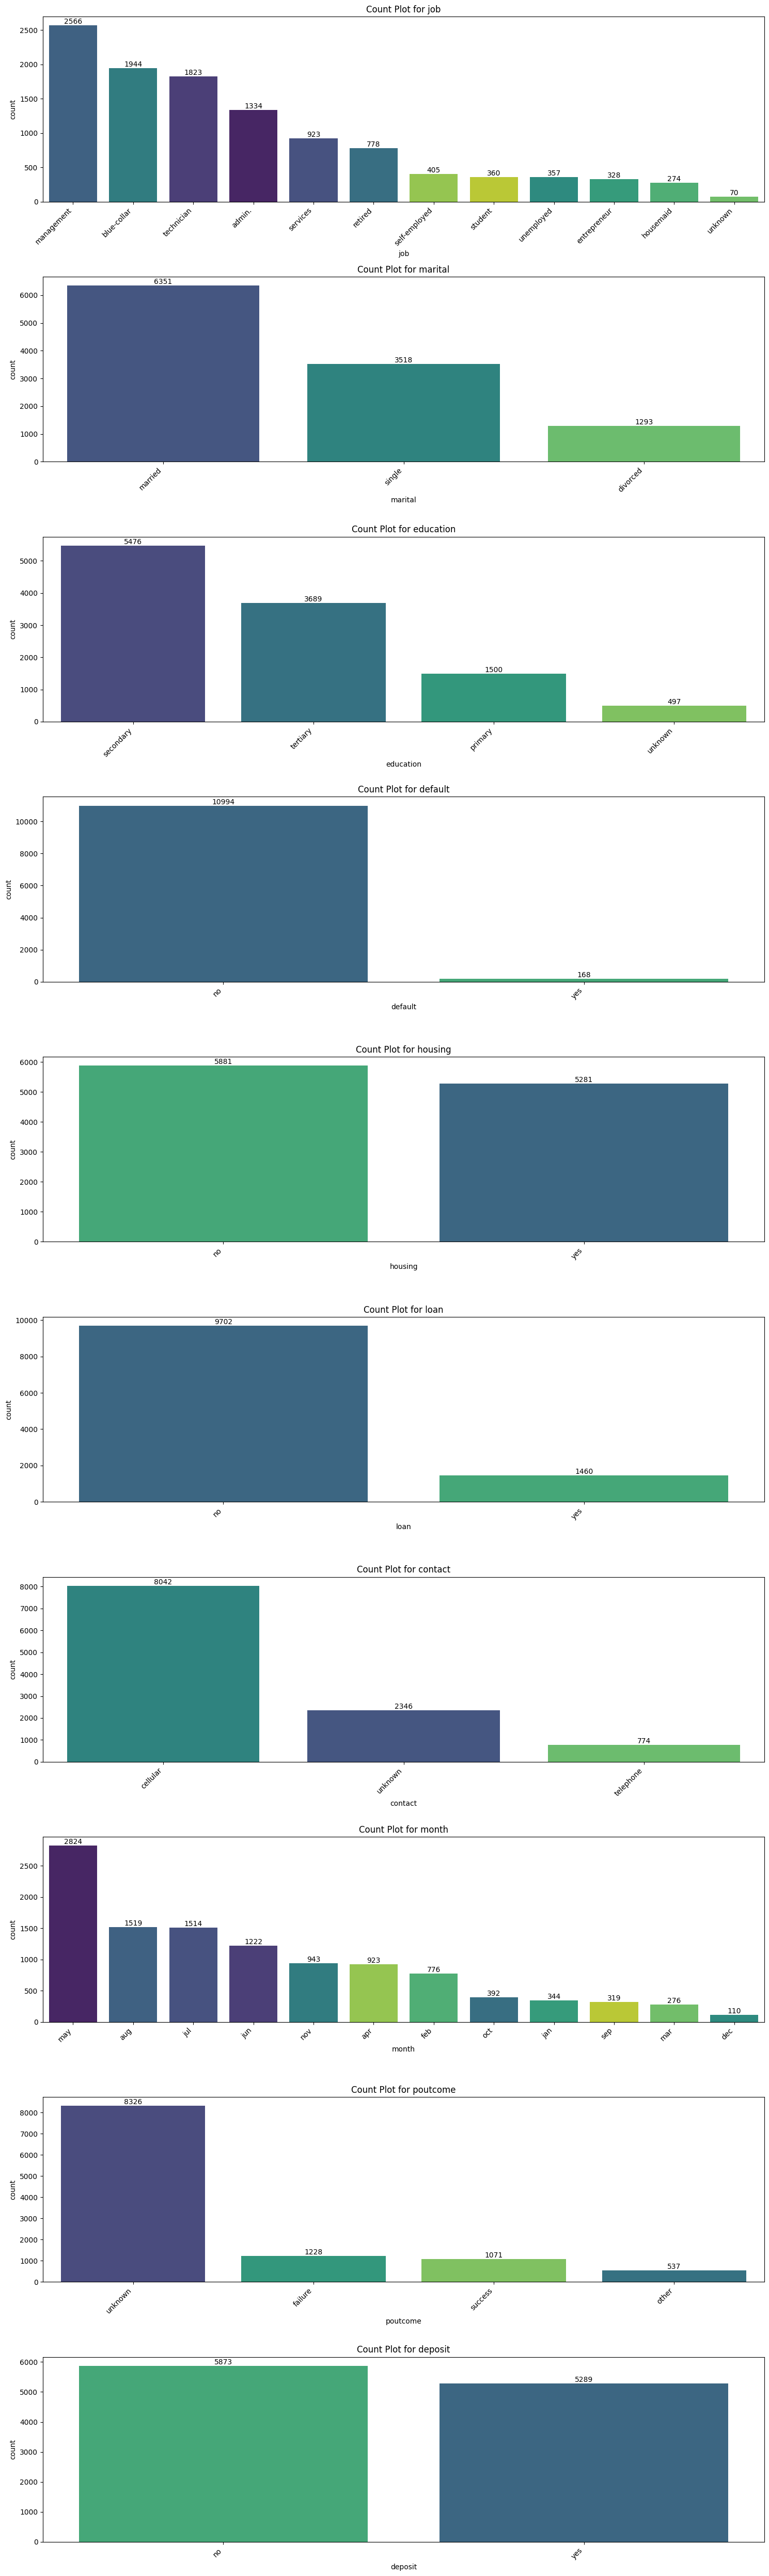

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 50))

# Loop through categorical columns and plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    ax = sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='viridis', legend=False)  # Assign hue and set legend=False
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')
    
    # Add counts on top of bars
    for p in ax.containers:
        ax.bar_label(p)

plt.tight_layout()
plt.show()

In [9]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [10]:
#  Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [11]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [12]:
#Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [13]:
# Combine encoded features and target
df_encoded = pd.concat([X, pd.Series(y_encoded, name='deposit', index=X.index)], axis=1)

In [14]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [15]:
#Choose features,
selected_features= ['duration', 'poutcome', 'balance', 'month', 'pdays', 'contact', 'age', 'housing']

In [16]:
#encoding Categorical
categorical_columns = ['poutcome', 'month', 'contact', 'housing']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

In [17]:
#  Standardize numerical columns
numerical_columns = ['duration', 'balance', 'pdays', 'age']
scaler = RobustScaler()
scaled_numerical = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [18]:
processed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

In [19]:
processed_data.head(2)

,duration,balance,pdays,age,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,housing_yes
0,2.198324,1.130517,0.0,1.176471,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3.385475,-0.318411,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


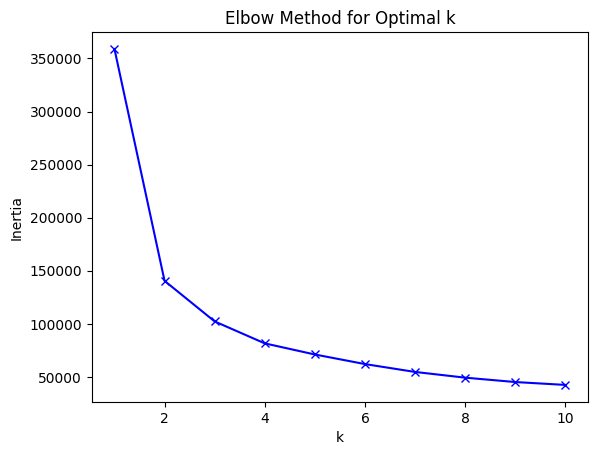

In [20]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_data)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)  # Adjust clusters as needed
df['Cluster'] = kmeans.fit_predict(processed_data)

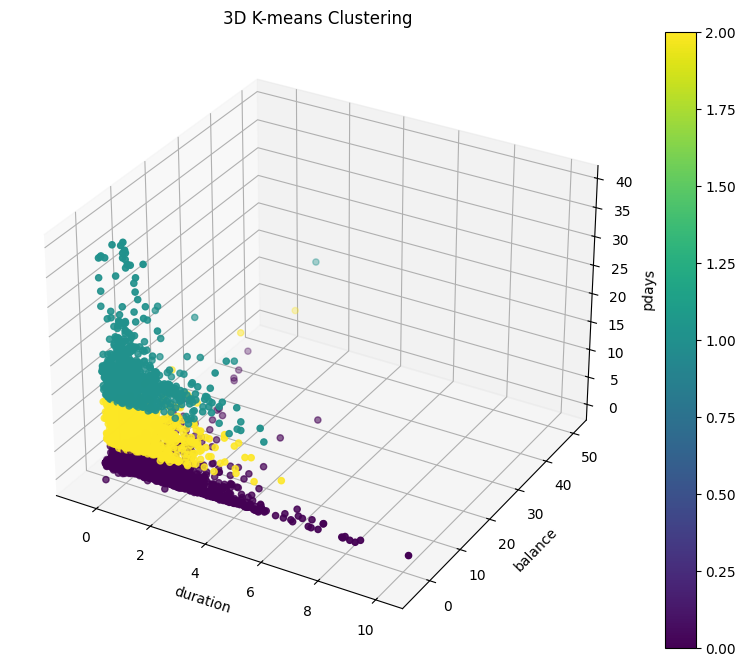

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(processed_data.iloc[:, 0], processed_data.iloc[:, 1], processed_data.iloc[:, 2], 
                     c=df['Cluster'], cmap='viridis')
ax.set_xlabel(processed_data.columns[0])
ax.set_ylabel(processed_data.columns[1])
ax.set_zlabel(processed_data.columns[2])
plt.title('3D K-means Clustering')
plt.colorbar(scatter)
plt.show()